In [13]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def read_image(path1,path2):
	read_img1 = cv2.imread(path1)
	read_img2 = cv2.imread(path2)
	return (read_img1,read_img2)

In [3]:

def convert_to_grayscale(pic1,pic2):
	gray_img1 = cv2.cvtColor(pic1,cv2.COLOR_BGR2GRAY)
	gray_img2 = cv2.cvtColor(pic2,cv2.COLOR_BGR2GRAY)
	return (gray_img1,gray_img2)

In [4]:
def detector(image1,image2):
	# creating ORB detector
	detect = cv2.ORB_create()

	# finding key points and descriptors of both images
	# using detectAndCompute() function
	key_point1,descrip1 = detect.detectAndCompute(image1,None)
	key_point2,descrip2 = detect.detectAndCompute(image2,None)
	return (key_point1,descrip1,key_point2,descrip2)

In [5]:

# function to find best detected features using brute
# force matcher and match them according to their humming distance
def BF_FeatureMatcher(des1,des2):
	brute_force = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
	no_of_matches = brute_force.match(des1,des2)

	# finding the humming distance of the matches and sorting them
	no_of_matches = sorted(no_of_matches,key=lambda x:x.distance)
	return no_of_matches

In [14]:

# function displaying the output image with the feature matching
def display_output(pic1,kpt1,pic2,kpt2,best_match):
	# drawing the feature matches using drawMatches() function
	output_image = cv2.drawMatches(pic1,kpt1,pic2,
								kpt2,best_match[:30],None,flags=2)
	plt.imshow(output_image)

In [7]:

first_image_path = '/content/book1.jpeg'
second_image_path = '/content/book2.png'

In [8]:

img1, img2 = read_image(first_image_path,second_image_path)

In [9]:
gray_pic1, gray_pic2 = convert_to_grayscale(img1,img2)

In [10]:
# storing the finded key points and descriptors of both of the images
key_pt1,descrip1,key_pt2,descrip2 = detector(gray_pic1,gray_pic2)

In [11]:

# sorting the number of best matches obtained from brute force matcher
number_of_matches = BF_FeatureMatcher(descrip1,descrip2)
tot_feature_matches = len(number_of_matches)
print(f'Total Number of Features matches found are {tot_feature_matches}')

Total Number of Features matches found are 13


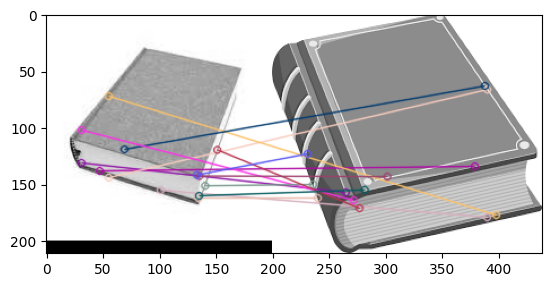

In [15]:

# after drawing the feature matches displaying the output image
display_output(gray_pic1,key_pt1,gray_pic2,key_pt2,number_of_matches)